This notebook will act as a place for WD+WD post processing. Here I will analyze different properties that should be optimized for the simulations

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')

In [4]:
import sys
import os

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 


In [3]:
## can take less than 1.4 chandrasekhar limit combined
# common envelop introduced to exlain double degnerate 
# noa

In [2]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/home/copy_h5_files/v03.08.01/CEalpha1/N1e6_MassiveWDWD_NSNS_CEalpha1_fbinNone.h5'  #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5,"r")

# let's gather the system parameters group 
SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

# Rates info directly taking out the 
merger_SEED = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['SEED'][()]
rates_DCO = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate'][()]
rates_z0_DCO = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate_z0'][()]
DCO_mask = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]
redshifts = Data_weights['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['redshifts'][()]
# rates_info = Data_weights["Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048"]

Data_weights.close()

In [ ]:
DCO_data_masked = SP_WD_data[DCO_mask]
# let's make sure that at least one of these white dwarfs are COWD
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(DCO_data_masked)
carbon_oxygen_bool = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))
DCO_COWD_data = DCO_data_masked[carbon_oxygen_bool]

Let's make life time and delay time plots

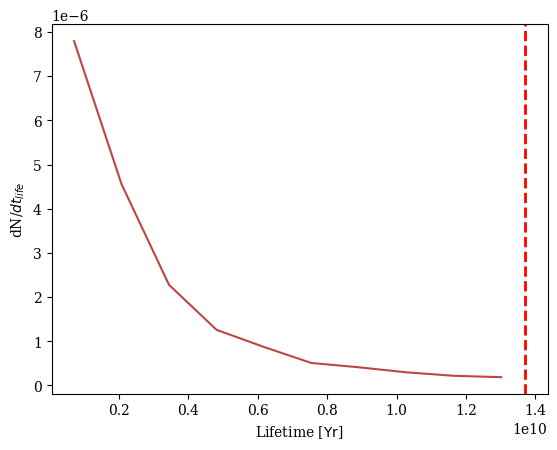

In [ ]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
time_life_log = np.log10(DCO_COWD_data['Time']*(1e6))
hist, bin_edges = np.histogram(DCO_COWD_data['Time']*(1e6), weights=DCO_COWD_data['mixture_weight'])#,bins=np.linspace(0,1.4e10,40))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Lifetime [$\mathrm{Yr}$]")
# plt.yscale('log')
# plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dt_{life}$")

## hubble time
age_universe = 13.7e9

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
# plt.legend()

# save figure 
# plt.savefig("./figures/timescale_plots/lifetime_COWD_WD.png",bbox_inches='tight',pad_inches=0.2)

In [ ]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg_chan = np.array(DCO_COWD_data['Time'])*1e6
t_col_lg_chan = np.array(DCO_COWD_data['Coalescence_Time'])*1e6

t_delay_lg_chan = [] # this will hold the delay time in Myr

for binaries_lg in range(DCO_COWD_data.shape[0]):

    delay_lg_chan = time_lg_chan[binaries_lg] + t_col_lg_chan[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg_chan.append(delay_lg_chan)

t_delay_lg_chan_array = np.array(t_delay_lg_chan)
DCO_COWD_data['Delay_Time(Yr)'] = t_delay_lg_chan_array

/tmp/ipykernel_36398/3984411165.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DCO_COWD_data['Delay_Time(Yr)'] = t_delay_lg_chan_array


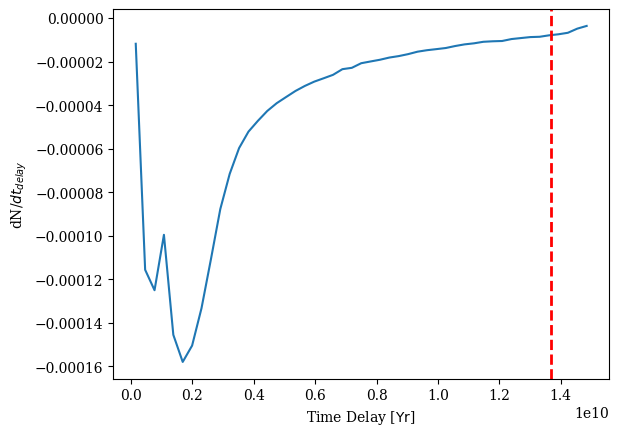

In [ ]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
time_delay_log = np.log10(DCO_COWD_data['Delay_Time(Yr)'])
hist, bin_edges = np.histogram(DCO_COWD_data['Delay_Time(Yr)'], weights=np.log10(DCO_COWD_data['mixture_weight']),bins=np.linspace(0,15e9,50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='WD+WD > $\mathrm{M_{tot}}$')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Time Delay [$\mathrm{Yr}$]")
# plt.yscale('log')
# plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dt_{delay}$")
# plt.title("Mass Distribution of the Primary Star")\

## hubble time
age_universe = 13.7e9

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
# plt.legend()

# save figure 
# plt.savefig("./figures/timescale_plots/delaytime_COWD_WD.png",bbox_inches='tight',pad_inches=0.2)

Let's drop anythign that is a stellar merger

In [6]:
# not_stellar_merger_bool = SP_WD_data['Merger'] == False
# SP_WD_NOT_SM = SP_WD_data[not_stellar_merger_bool]

Let's make sure there are not stellar mergers

In [8]:
SM_bool = SP_WDWD_data['Merger']==True
sum(SM_bool)

0

In [9]:
pd.set_option('display.max_columns', None)
display(SP_WDWD_data)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
1,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.890890,0.558981,2.321444,0.914988,0,0,0.000876,0.000876,0.0,0.0,0,1,1,0.997185,0.720324,5.859431,0.000719,-0.406432,-0.556034,6.277157,0.580181,198801.165570,412.982625,265.0,265.0,30.0,30.0,11,11,1,1,0.0,9025.539968,0,1.0,0.245931
9,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.102787,1.102454,4.349249,4.329800,0,0,0.004591,0.004591,0.0,0.0,0,1,9,0.364461,0.501875,3.136129,3.115036,-0.821753,-1.339439,1.986896,1.373245,59365.315016,69.686737,265.0,265.0,30.0,30.0,11,11,1,1,0.0,157.279070,0,1.0,0.152716
12,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.571069,0.746677,3.684305,2.204175,0,0,0.001030,0.001030,0.0,0.0,0,1,12,0.446222,0.740050,5.487653,1.654457,0.067530,-0.303690,4.546524,5.772658,5.941011,0.163756,265.0,265.0,30.0,30.0,11,11,1,1,0.0,594.089778,0,1.0,3.756308
13,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'NA ',0.887465,0.602687,4.078969,1.781343,0,0,0.027172,0.027172,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,12982.159973,12.142024,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1819.896095,0,1.0,0.092467
18,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.937741,0.936780,3.338269,3.309963,0,0,0.001794,0.001794,0.0,0.0,0,1,18,0.076011,0.505453,2.718266,5.520416,-0.689718,-0.633607,5.707490,4.713245,20581.225706,26.808450,265.0,265.0,30.0,30.0,11,11,1,1,0.0,274.482396,0,1.0,0.186661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.275749,0.658100,6.139127,2.235004,0,0,0.029347,0.029347,0.0,0.0,0,1,999995,0.719032,0.460826,3.264003,4.386358,1.298580,1.137955,1.846045,3.903730,93115.659434,99.297629,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1156.571375,0,1.0,0.094042
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.780910,0.722761,2.547762,2.347377,0,0,0.014557,0.014557,0.0,0.0,0,1,999996,0.376224,0.083434,3.617568,2.676623,-0.381096,-0.559024,3.960636,2.509714,13891.321460,19.738301,265.0,265.0,30.0,30.0,11,11,1,1,0.0,913.213610,0,1.0,0.151815
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.381447,0.667080,7.142919,1.929326,0,0,0.016232,0.016232,0.0,0.0,0,1,999997,0.223393,0.947942,2.010605,1.238487,-0.178701,0.217135,0.529336,0.742038,22354.008782,34.672764,265.0,265.0,30.0,30.0,12,11,1,1,0.0,1503.425822,0,1.0,0.234124
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.942527,0.770343,3.106252,2.334912,0,0,0.003586,0.003586,0.0,0.0,0,1,999998,0.796172,0.013945,5.331922,1.883791,-0.859814,-0.800516,5.360359,1.443981,26039.406126,37.920752,265.0,265.0,30.0,30.0,11,11,1,1,0.0,742.013427,0,1.0,0.115753


Let's remove the systems that have secondary stars with unknown masses

In [10]:
nan_mask = np.where(~np.isnan(SP_WDWD_data['Mass(2)'])==False)[0]
nan_mask_array = np.array(nan_mask)
nan_mask_array

array([ 23545,  85130, 139157, 164201, 247564, 291266, 315721, 335138,
       371313, 453465, 516147, 683735, 759240, 804186, 811519])

In [11]:
print(len(SP_WDWD_data.iloc[nan_mask]))
weird_WDWD = SP_WDWD_data.iloc[nan_mask]
weird_WDWD_seeds = weird_WDWD['SEED']
weird_WDWD

15


,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
76164,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'4-8 ',b'5 ',0.808380,NaN,2.792781,2.533494,0,0,0.000104,0.000104,0.0,0.0,0,1,76164,0.700534,0.675839,5.311317,5.171071,-0.346293,-0.780983,1.429662,4.625180,31.571946,0.424560,265.0,265.0,30.0,30.0,11,11,1,1,0.0,476.625550,0,1.0,0.479547
160449,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2-8 ',b'5 ',0.796188,NaN,5.676667,2.907361,0,0,0.000111,0.000111,0.0,0.0,0,1,160449,0.222173,0.089523,0.411938,1.930070,0.525004,-0.812323,4.353415,3.954637,33.270564,0.410832,265.0,265.0,30.0,30.0,11,11,1,1,0.0,318.841963,0,1.0,0.128026
220796,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'5 ',1.086905,NaN,4.337317,2.891529,0,0,0.000128,0.000128,0.0,0.0,0,1,220796,0.388314,0.783533,3.032043,0.721811,0.025721,-0.662413,0.462214,4.980825,42.611331,6.075247,265.0,265.0,30.0,30.0,11,11,1,1,0.0,341.335508,0,1.0,0.152951
248745,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2-8 ',b'5 ',0.809289,NaN,6.118073,2.858380,0,0,0.000107,0.000107,0.0,0.0,0,1,248745,0.957658,0.603146,4.301045,3.857207,-0.370116,0.000329,5.952252,0.414629,31.532240,0.485158,265.0,265.0,30.0,30.0,11,11,1,1,0.0,337.831315,0,1.0,0.237089
341936,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'5 ',1.241623,NaN,5.190157,2.846372,0,0,0.000137,0.000137,0.0,0.0,0,1,341936,0.767580,0.977678,4.321166,2.590686,0.523258,-1.008290,0.564027,3.990874,46.580476,7.665111,265.0,265.0,30.0,30.0,12,11,1,1,0.0,354.951794,0,1.0,0.181621
390690,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.547024,NaN,3.521822,2.503963,0,0,0.000103,0.000103,0.0,0.0,0,1,390690,0.972259,0.079733,5.031324,5.622611,-0.728321,0.682687,2.641109,1.650154,19.290750,0.187996,265.0,265.0,30.0,30.0,11,11,1,1,0.0,415.195003,0,1.0,0.416401
418027,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.864751,NaN,4.972977,2.876057,0,0,0.000100,0.000100,0.0,0.0,0,1,418027,0.171763,0.652025,1.021203,0.145184,-1.357831,-0.867206,2.606426,2.634657,35.092901,0.436495,265.0,265.0,30.0,30.0,11,11,1,1,0.0,327.603536,0,1.0,0.175685
439679,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.817578,NaN,4.796557,2.717354,0,0,0.000120,0.000120,0.0,0.0,0,1,439679,0.410867,0.626500,1.782993,5.413069,0.572969,1.182716,5.528094,1.651036,32.692434,0.425520,265.0,265.0,30.0,30.0,11,11,1,1,0.0,373.346402,0,1.0,0.193059
480059,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.522216,NaN,3.393703,2.530239,0,0,0.000102,0.000102,0.0,0.0,0,1,480059,0.010465,0.870046,3.582408,2.601107,0.242248,0.276914,4.448985,3.579158,21.829910,0.178400,265.0,265.0,30.0,30.0,11,11,1,1,0.0,400.302711,0,1.0,0.609360
571705,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.745503,NaN,4.474262,2.680872,0,0,0.000108,0.000108,0.0,0.0,0,1,571705,0.160370,0.369334,0.097248,3.911085,0.275305,-0.077748,0.499808,5.775317,25.637191,0.328265,265.0,265.0,30.0,30.0,11,11,1,1,0.0,377.825326,0,1.0,0.273682


Let's drop these rows from the other dataframe

In [12]:
SP_WDWD_data = SP_WDWD_data.drop(SP_WDWD_data.index[nan_mask_array])

In [13]:
## let's see if these systems have nonzero masses in other groups

# let's gather the rlof group 

RLOF_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_RLOF"].keys(): #looping through the "keys" or paramters in BSE_RLOF

    RLOF_WD_data[key] = Data_weights["BSE_RLOF"][key][()] # adding these columns to the dataframe

In [14]:
# let's now only select the seeds in this table that overlap with RLOF table
overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],weird_WDWD_seeds)

/tmp/ipykernel_30857/2635136133.py:2: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],weird_WDWD_seeds)


In [15]:
# reading in the sliced table
RLOF_WD_data_weird = RLOF_WD_data[overlap_seeds_bool]
RLOF_WD_data_weird.sort_values(by="SEED")

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
79756,9.477542e-22,1,0.0,0.0,0.000444,NaN,3,0.808380,0.808380,2.706756,NaN,20730.201311,0,0.000104,0,0,0,1,0.010215,0.010215,0.000099,NaN,179.007362,0.000014,1.001054,NaN,1,76164,368.107443,31.571946,11,11,5,11,8298.156463,NaN,476.620034,476.625550,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
79757,1.220134e-01,0,0.0,0.0,317.827957,151.480093,1,2.764739,0.857224,2.533486,2.766228,297.151636,0,0.000104,0,1,0,0,36.101373,0.183722,1.017730,0.001969,1.949831,1.565152,0.057206,0.009855,1,76164,91.777388,329.146379,4,7,1,1,56917.431146,16202.726642,369.040643,369.135713,-0.146177,-0.146177,0.0,-0.146177,-0.333333,-0.333333,0.0,-0.333333
79758,6.993462e-04,0,0.0,0.0,7.410350,184.551988,2,0.857004,0.808380,2.766228,2.766262,56977.394796,0,0.000104,0,1,0,0,98.204952,0.010215,1.052567,0.000101,1.875398,1.875322,0.011807,0.010623,1,76164,329.166352,361.979321,8,11,1,1,94324.147472,15551.393925,372.941087,372.944536,0.000000,-0.146177,0.0,-0.146177,0.000000,-0.333333,0.0,-0.333333
132253,7.488069e-22,1,0.0,0.0,0.000149,NaN,3,0.796188,0.796188,2.937407,NaN,22467.762893,0,0.000111,0,0,0,1,0.010355,0.010355,0.000101,NaN,188.747437,0.000014,1.014710,NaN,1,160449,376.301080,33.270564,11,11,5,11,6272.815397,NaN,318.836820,318.841963,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
132254,1.971614e-02,0,0.0,0.0,271.948529,137.062469,1,5.676097,1.027933,2.907359,2.999003,900.888780,0,0.000111,0,1,0,0,39.257851,0.208940,1.014844,0.002935,1.299483,1.315724,0.045575,0.011360,1,160449,88.347845,244.563878,2,7,1,1,51331.988948,17235.533283,68.447314,68.465836,-0.145916,-0.145916,0.0,-0.145916,-0.333333,-0.333333,0.0,-0.333333
132255,7.086217e-04,0,0.0,0.0,7.511597,146.276709,2,1.027593,0.796188,2.999002,2.999166,29873.472876,0,0.000111,0,1,0,0,79.225573,0.010355,1.112808,0.000103,1.363003,1.363023,0.011766,0.007421,1,160449,244.584602,370.177405,8,11,1,1,94001.319755,17211.537700,90.345477,90.349836,0.000000,-0.145916,0.0,-0.145916,0.000000,-0.333333,0.0,-0.333333
157975,5.855646e-05,1,0.0,0.0,10.840567,145.020530,1,3.728907,1.086905,2.891524,2.891524,389889.932612,0,0.000128,0,1,0,0,573.541953,0.007064,1.002336,0.000060,1.429367,1.429367,0.002806,0.007753,1,220796,1426.520275,396.142532,6,11,1,1,124745.678420,16771.156970,134.558947,134.563947,0.000000,-0.146350,0.0,-0.146350,0.000000,-0.333333,0.0,-0.333333
157976,3.718429e-21,1,0.0,0.0,0.000247,NaN,2,1.086905,1.086905,2.828726,NaN,22404.348647,0,0.000128,0,0,0,1,0.007064,0.007064,0.000059,NaN,186.560974,0.000014,1.000131,NaN,1,220796,402.496128,42.611331,11,11,5,11,8620.455845,NaN,341.330311,341.335508,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
170112,1.162067e-02,0,0.0,0.0,384.715649,121.682753,1,6.117236,1.137111,2.858378,2.916250,1387.113398,0,0.000107,0,1,0,0,49.163538,0.225290,1.056449,0.003551,1.265885,1.277163,0.038475,0.013113,1,248745,104.334219,210.749196,2,7,1,1,53912.713989,16980.937354,59.362898,59.378036,-0.146021,-0.146021,0.0,-0.146021,-0.333333,-0.333333,0.0,-0.333333
170113,9.397230e-22,1,0.0,0.0,0.000123,NaN,3,0.809289,0.809289,2.856466,NaN,20876.344843,0,0.000107,0,0,0,1,0.010204,0.010204,0.000100,NaN,182.222723,0.000014,1.012558,NaN,1,248745,366.953666,31.532240,11,11,5,11,6029.525100,NaN,337.825923,337.831315,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


#### Let's only select the carbon oxygen white dwarfs

In [16]:
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(SP_WDWD_data)
carbon_oxygen_bool = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))
SP_COWD_data = SP_WDWD_data[carbon_oxygen_bool]

In [18]:
SP_COWD_data

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
1,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.890890,0.558981,2.321444,0.914988,0,0,0.000876,0.000876,0.0,0.0,0,1,1,0.997185,0.720324,5.859431,0.000719,-0.406432,-0.556034,6.277157,0.580181,198801.165570,412.982625,265.0,265.0,30.0,30.0,11,11,1,1,0.0,9025.539968,0,1.0,0.245931
9,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.102787,1.102454,4.349249,4.329800,0,0,0.004591,0.004591,0.0,0.0,0,1,9,0.364461,0.501875,3.136129,3.115036,-0.821753,-1.339439,1.986896,1.373245,59365.315016,69.686737,265.0,265.0,30.0,30.0,11,11,1,1,0.0,157.279070,0,1.0,0.152716
12,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.571069,0.746677,3.684305,2.204175,0,0,0.001030,0.001030,0.0,0.0,0,1,12,0.446222,0.740050,5.487653,1.654457,0.067530,-0.303690,4.546524,5.772658,5.941011,0.163756,265.0,265.0,30.0,30.0,11,11,1,1,0.0,594.089778,0,1.0,3.756308
13,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'NA ',0.887465,0.602687,4.078969,1.781343,0,0,0.027172,0.027172,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,12982.159973,12.142024,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1819.896095,0,1.0,0.092467
18,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.937741,0.936780,3.338269,3.309963,0,0,0.001794,0.001794,0.0,0.0,0,1,18,0.076011,0.505453,2.718266,5.520416,-0.689718,-0.633607,5.707490,4.713245,20581.225706,26.808450,265.0,265.0,30.0,30.0,11,11,1,1,0.0,274.482396,0,1.0,0.186661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.275749,0.658100,6.139127,2.235004,0,0,0.029347,0.029347,0.0,0.0,0,1,999995,0.719032,0.460826,3.264003,4.386358,1.298580,1.137955,1.846045,3.903730,93115.659434,99.297629,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1156.571375,0,1.0,0.094042
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.780910,0.722761,2.547762,2.347377,0,0,0.014557,0.014557,0.0,0.0,0,1,999996,0.376224,0.083434,3.617568,2.676623,-0.381096,-0.559024,3.960636,2.509714,13891.321460,19.738301,265.0,265.0,30.0,30.0,11,11,1,1,0.0,913.213610,0,1.0,0.151815
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.381447,0.667080,7.142919,1.929326,0,0,0.016232,0.016232,0.0,0.0,0,1,999997,0.223393,0.947942,2.010605,1.238487,-0.178701,0.217135,0.529336,0.742038,22354.008782,34.672764,265.0,265.0,30.0,30.0,12,11,1,1,0.0,1503.425822,0,1.0,0.234124
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.942527,0.770343,3.106252,2.334912,0,0,0.003586,0.003586,0.0,0.0,0,1,999998,0.796172,0.013945,5.331922,1.883791,-0.859814,-0.800516,5.360359,1.443981,26039.406126,37.920752,265.0,265.0,30.0,30.0,11,11,1,1,0.0,742.013427,0,1.0,0.115753


In [19]:
# let's make sure there are the at leats one COWD in the dataframe
star_co = np.logical_or(SP_COWD_data['Stellar_Type(1)']==11,SP_COWD_data['Stellar_Type(2)']==11)
sum(star_co)

836773

#### Let's look at the mass distiburions

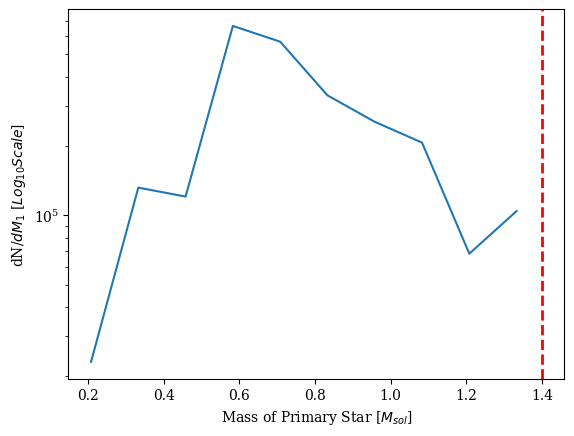

In [19]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_COWD_data['Mass(1)'], weights=SP_COWD_data['mixture_weight'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Mass of Primary Star [$M_{sol}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dM_{1}$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\

# chandrasekhar limit
chandra_limit = 1.4 

plt.axvline(chandra_limit, color='r', linestyle='--', linewidth=2)
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)

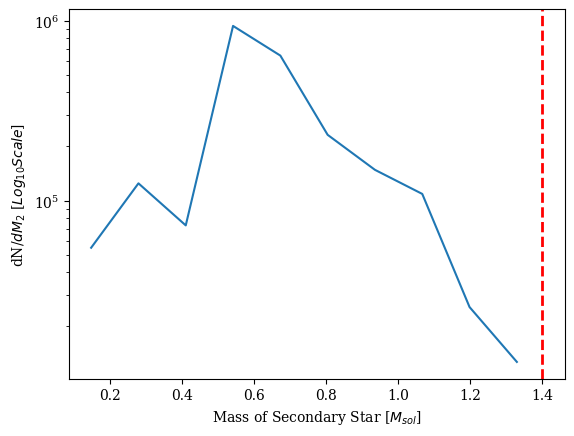

In [20]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_COWD_data['Mass(2)'], weights=SP_COWD_data['mixture_weight'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Mass of Secondary Star [$M_{sol}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dM_{2}$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\

# chandrasekhar limit
chandra_limit = 1.4 

plt.axvline(chandra_limit, color='r', linestyle='--', linewidth=2)
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)

Let's make sure we are only selecting the systems with M1 <> 1.4 and M2 < 1.4

In [21]:
# we want to make sure both of our stars ahve masses than are sub chandrasekhar (at least until we figure out what is happening to the COMPAS bug)
chandra_bool_m1m2 = np.logical_and(SP_COWD_data['Mass(1)']<1.44,SP_COWD_data['Mass(2)']<1.44)
SP_COWD_data_sb_chandra = SP_COWD_data[chandra_bool_m1m2]

print(max(SP_COWD_data_sb_chandra['Mass(1)']))
print(min(SP_COWD_data_sb_chandra['Mass(2)']))
print(len(SP_COWD_data))
print(len(SP_COWD_data_sb_chandra))

1.3955088661766184
0.08289716636320858
836773
836773


#### Let's find the time + delay time distirbution

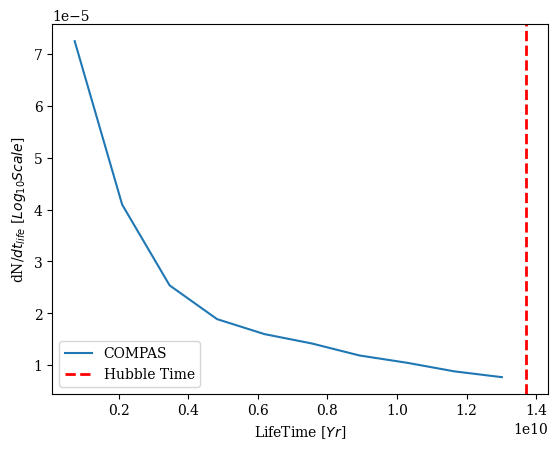

In [22]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_COWD_data_sb_chandra['Time']*1e6, weights=SP_COWD_data_sb_chandra['mixture_weight'])#,bins=np.linspace(0,15e9,50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='COMPAS')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"LifeTime [$Yr$]")
# plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dt_{life}$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\

## hubble time
age_universe = 13.7e9

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
plt.legend()

In [20]:
# Add columns for the more and less massive compact object

SP_COWD_data_sb_chandra['M_moremass'] = SP_COWD_data_sb_chandra[['Mass(1)', 'Mass(2)']].max(axis=1)
SP_COWD_data_sb_chandra['M_lessmass'] = SP_COWD_data_sb_chandra[['Mass(1)', 'Mass(2)']].min(axis=1)

NameError: name 'SP_COWD_data_sb_chandra' is not defined

In [21]:
# Add columns for the more and less massive compact object

SP_WDWD_data['M_moremass'] = SP_WDWD_data[['Mass(1)', 'Mass(2)']].max(axis=1)
SP_WDWD_data['M_lessmass'] = SP_WDWD_data[['Mass(1)', 'Mass(2)']].min(axis=1)

In [22]:
# Add columns for the more and less massive compact object

SP_COWD_data['M_moremass'] = SP_COWD_data[['Mass(1)', 'Mass(2)']].max(axis=1)
SP_COWD_data['M_lessmass'] = SP_COWD_data[['Mass(1)', 'Mass(2)']].min(axis=1)

In [23]:
time_col_wd = useful_fncs.tgw((SP_COWD_data_sb_chandra['SemiMajorAxis'].values),(SP_COWD_data_sb_chandra['Eccentricity']),(SP_COWD_data_sb_chandra['M_moremass'].values),(SP_COWD_data_sb_chandra['M_lessmass'].values),Data_weights,'BSE_System_Parameters','SemiMajorAxis')

NameError: name 'SP_COWD_data_sb_chandra' is not defined

In [24]:
time_col_wd_all = useful_fncs.tgw((SP_WDWD_data['SemiMajorAxis'].values),(SP_WDWD_data['Eccentricity']),(SP_WDWD_data['M_moremass'].values),(SP_WDWD_data['M_lessmass'].values),Data_weights,'BSE_System_Parameters','SemiMajorAxis')

In [25]:
time_col_co_wd = useful_fncs.tgw((SP_COWD_data['SemiMajorAxis'].values),(SP_COWD_data['Eccentricity']),(SP_COWD_data['M_moremass'].values),(SP_COWD_data['M_lessmass'].values),Data_weights,'BSE_System_Parameters','SemiMajorAxis')

In [29]:
SP_COWD_data_sb_chandra['Coalescence_Time'] = time_col_wd

In [26]:
SP_COWD_data['Coalescence_Time'] = time_col_co_wd

In [27]:
SP_WDWD_data['Coalescence_Time'] = time_col_wd_all

In [32]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(SP_COWD_data_sb_chandra['Time'])*1e6
t_col_lg = np.array(time_col_wd)*1e6

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(SP_COWD_data_sb_chandra.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)


In [28]:
t_delay_lg_array = np.array(t_delay_lg)

NameError: name 't_delay_lg' is not defined

In [29]:
SP_COWD_data_sb_chandra['Delay_Time(Yr)'] = t_delay_lg_array

NameError: name 't_delay_lg_array' is not defined

In [30]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg_chan = np.array(SP_WDWD_data['Time'])*1e6
t_col_lg_chan = np.array(time_col_wd_all)*1e6

t_delay_lg_chan = [] # this will hold the delay time in Myr

for binaries_lg in range(SP_WDWD_data.shape[0]):

    delay_lg_chan = time_lg_chan[binaries_lg] + t_col_lg_chan[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg_chan.append(delay_lg_chan)


In [31]:
t_delay_lg_chan_array = np.array(t_delay_lg_chan)

In [32]:
SP_WDWD_data['Delay_Time(Yr)'] = t_delay_lg_chan_array

In [33]:
# SP_WDWD_data_sb_chandra =SP_WDWD_data_sb_chandra.drop(['Delay_Time'],axis=1)

In [34]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg_co = np.array(SP_COWD_data['Time'])*1e6
t_col_lg_co = np.array(time_col_co_wd)*1e6

t_delay_lg_co = [] # this will hold the delay time in Myr

for binaries_lg_co in range(SP_COWD_data.shape[0]):

    delay_lg_co = time_lg_co[binaries_lg_co] + t_col_lg_co[binaries_lg_co] # adding the two values together to get the delay time
    t_delay_lg_co.append(delay_lg_co)


In [35]:
t_delay_lg_co_array = np.array(t_delay_lg_co)

In [36]:
SP_COWD_data['Delay_Time(Yr)'] = t_delay_lg_co_array

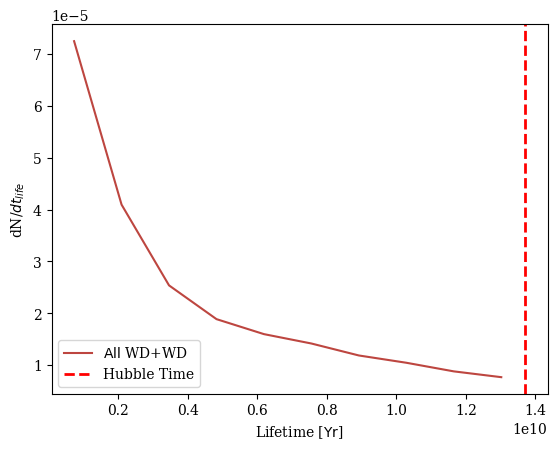

In [42]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
time_life_log = np.log10(SP_COWD_data_sb_chandra['Time']*(1e6))
hist, bin_edges = np.histogram(SP_COWD_data_sb_chandra['Time']*(1e6), weights=SP_COWD_data_sb_chandra['mixture_weight'])#,bins=np.linspace(0,1.4e10,40))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Lifetime [$\mathrm{Yr}$]")
# plt.yscale('log')
# plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dt_{life}$")

## hubble time
age_universe = 13.7e9

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
plt.legend()

In [37]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
time_delay_log = np.log10(t_delay_lg_array)
hist, bin_edges = np.histogram(t_delay_lg_array, weights=np.log10(SP_COWD_data_sb_chandra['mixture_weight']),bins=np.linspace(0,15e9,50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='WD+WD > $\mathrm{M_{tot}}$')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Time Delay [$\mathrm{Yr}$]")
# plt.yscale('log')
# plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dt_{delay}$")
# plt.title("Mass Distribution of the Primary Star")\

## hubble time
age_universe = 13.7e9

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
plt.legend()

NameError: name 't_delay_lg_array' is not defined

In [38]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
time_col_log = np.log10(SP_COWD_data_sb_chandra['Coalescence_Time']*(1e6))
hist, bin_edges = np.histogram(time_col_log, weights=SP_COWD_data_sb_chandra['mixture_weight'])#,bins=np.linspace(0,1.4e30,50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='WD+WD > $\mathrm{M_{tot}}$')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"$\log_{10}(t_{col}/\mathrm{Yr})$")
# plt.yscale('log')
# plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$\log_{10}(t_{col}/\mathrm{Yr})$")

## hubble time
age_universe = 13.7e9

plt.axvline(np.log10(age_universe), color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
plt.legend()

NameError: name 'SP_COWD_data_sb_chandra' is not defined

Text(0, 0.5, 'dN/$\\log_{10}(a/\\mathrm{R_{\\odot}})$')

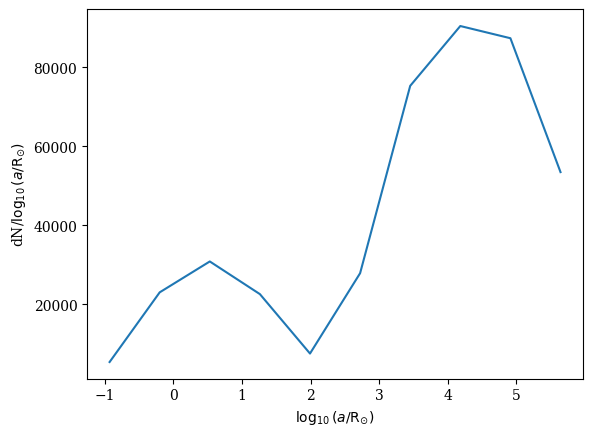

In [45]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution

# in histograms usually want to take the log of the value rather than changing the y or xscale to log
# helps us keep track of what values we are actually plotting 
separations_log = np.log10(SP_COWD_data_sb_chandra['SemiMajorAxis'])
hist, bin_edges = np.histogram(separations_log, weights=SP_COWD_data_sb_chandra['mixture_weight'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"$\log_{10}(a/\mathrm{R_{\odot}})$")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$\log_{10}(a/\mathrm{R_{\odot}})$")
# plt.title("Mass Distribution of the Primary Star")\


We want to add to this plot so we have vertical lines corresponding to different conditions

First we must look at the RLOF data so that we can gather information about systems with R1+R2 > a

In [41]:
## let's see if these systems have nonzero masses in other groups

# let's gather the rlof group 

RLOF_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_RLOF"].keys(): #looping through the "keys" or paramters in BSE_RLOF

    RLOF_WD_data[key] = Data_weights["BSE_RLOF"][key][()] # adding these columns to the dataframe

In [46]:
# let's get the overlapping seed data
overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],SP_COWD_data['SEED'])
# reading in the sliced table
RLOF_WD_data_overlap = RLOF_WD_data[overlap_seeds_bool]
RLOF_WD_data_overlap.sort_values(by="SEED")

/tmp/ipykernel_30857/671272331.py:2: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],SP_COWD_data['SEED'])


,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
6,4.741412e-21,1,0.0,0.0,0.000112,4903.653114,2,0.571069,0.571069,2.451374,0.746976,4.220406e+03,0,0.001030,0,0,0,1,0.013177,0.013177,0.000252,0.006233,101.552442,0.442456,1.003007,0.185133,1,12,199.481974,5.939665,11,11,5,8,5183.226756,72689.629540,593.868532,593.881015,0.000000,0.639597,0.0,0.000000,0.000000,3.593265,0.0,0.000000
7,9.576206e-02,0,0.0,0.0,31.122640,65.036593,1,3.683827,0.571474,2.204171,2.502217,8.678800e+01,0,0.001030,0,1,0,0,15.769045,0.127128,1.056006,0.002482,1.320597,1.368952,0.111795,0.013704,1,12,35.215570,196.155880,2,7,1,1,38275.914919,14024.030092,177.706321,177.764377,-0.222642,-0.222642,0.0,-0.222642,-0.333333,-0.333333,0.0,-0.333333
8,8.858895e-07,0,0.0,0.0,75.517361,9.682190,1,1.159063,0.887465,1.781343,1.781343,3.264432e+06,0,0.027172,0,1,0,0,1789.739129,0.009319,1.000955,0.000004,1.670672,1.670672,0.000768,0.000525,1,13,5222.265648,7230.805809,6,11,1,1,176445.245935,7885.430252,209.700811,209.705811,0.000000,-0.316577,0.0,-0.316577,0.000000,-0.333333,0.0,-0.333333
12,8.477406e-21,1,0.0,0.0,0.018129,7627.096020,2,0.775421,0.775421,5.273279,1.339268,6.261407e+03,0,0.013982,0,0,0,1,0.010596,0.010596,0.000154,0.003162,163.599897,3.326348,1.006842,0.773493,1,20,297.154668,10.072279,11,11,5,8,20596.854421,29606.255076,192.341035,192.349580,0.000000,-0.146189,0.0,0.000000,0.000000,0.893884,0.0,0.000000
13,4.778593e-01,0,0.0,0.0,102.124155,744.463333,1,4.684866,0.780926,3.497666,5.363200,1.050536e+02,0,0.013982,0,1,0,0,16.258186,0.168282,1.088687,0.002497,2.732632,2.762211,0.209113,0.017242,1,20,36.923094,292.539366,2,7,1,1,44775.586586,18159.752981,119.624828,119.651222,-0.293396,-0.293396,0.0,-0.293396,-0.333333,-0.333333,0.0,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494344,3.982350e-19,1,0.0,0.0,0.000100,388.616458,2,0.746323,0.746323,1.884223,0.601379,8.334348e+02,0,0.001812,0,0,0,1,0.010938,0.010938,0.000266,0.005848,63.198012,0.182485,1.009052,0.107677,1,999974,135.933752,4.702594,11,11,5,8,5517.856741,60054.374215,1142.959812,1142.988652,0.000000,-0.055281,0.0,0.000000,0.000000,1.031759,0.0,0.000000
494346,2.643454e-02,0,0.0,0.0,341.498943,116.432737,1,1.980523,0.539050,1.995975,2.034079,1.247677e+04,0,0.022641,0,1,0,0,193.292724,0.173572,1.009598,0.000254,17.753475,17.621477,0.092400,0.014138,1,999975,506.163036,2511.459752,5,8,4,4,59619.033315,4521.423232,1459.512506,1459.519309,-0.026612,-0.306511,0.0,-0.306511,1.324044,0.063615,0.0,0.063615
494351,9.557627e-04,1,0.0,0.0,1036.304392,14.737375,1,1.973787,0.664667,1.537839,1.537839,3.600607e+03,0,0.000144,0,1,0,0,87.154826,0.230925,1.005199,0.048900,1.127577,1.127577,0.014575,0.162957,1,999981,216.380585,15.275450,5,8,1,1,68220.371865,10661.282973,874.591896,874.603628,0.165564,-0.147606,0.0,-0.147606,1.421011,-0.333333,0.0,-0.333333
494350,5.495433e-15,0,0.0,0.0,0.000027,17.120385,2,0.664560,0.664560,1.537462,0.257299,5.426133e+00,0,0.000144,0,0,0,1,0.011936,0.011936,0.002527,0.000941,6.924883,0.019363,1.000579,0.002350,1,999981,15.278810,27.423122,11,11,2,10,3827.881314,84463.587963,1530.852003,1531.618963,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [47]:
# let's select for only binary WD to make sure we are dealing with the same systems
wd_bool = useful_fncs.WDWD_bools(RLOF_WD_data_overlap,'Stellar_Type(1)>MT','Stellar_Type(2)>MT')
RLOF_COWD = RLOF_WD_data_overlap[wd_bool]
RLOF_COWD

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
14,1.711519e-09,0,0.0,0.0,0.018111,52.637859,3,0.775421,0.775421,1.339160,0.806915,938.990478,0,0.013982,0,0,0,1,0.010596,0.010596,0.003161,0.003006,4.799121,0.010232,1.115925,0.002850,1,20,10.072797,9.387247,11,11,8,11,20591.870970,153861.663124,192.363048,192.369580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,8.583619e-20,0,0.0,0.0,0.000006,49.253935,2,0.982019,0.982019,1.033987,0.469994,3573.728166,0,0.000448,0,0,0,1,0.008260,0.008260,0.000110,0.000044,76.691005,0.014707,1.000559,0.000109,1,41,199.920697,425.131543,11,11,3,10,3088.562225,126220.279550,4315.782119,4315.862122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,2.130095e-17,0,0.0,0.0,0.000008,101.642372,2,1.099616,1.099616,1.017616,0.345271,305.199394,0,0.005923,0,0,0,1,0.006915,0.006915,0.000232,0.000050,28.938553,0.017077,1.004836,0.000208,1,81,77.369359,288.817752,11,11,3,10,3640.532601,140392.079962,7653.977451,7654.241312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,8.946851e-15,1,0.0,0.0,0.000003,41.394688,2,0.568929,0.568929,0.935760,0.211294,3.048891,0,0.002140,0,0,0,1,0.013207,0.013207,0.002878,0.379784,5.806945,0.020943,1.008409,0.945023,1,86,13.625849,0.074546,11,11,3,10,2005.081872,101273.988638,8870.786950,8874.314167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,3.815600e-15,0,0.0,0.0,0.000010,16.703826,2,0.595994,0.595994,1.571713,0.256939,5.140487,0,0.000136,0,0,0,1,0.012833,0.012833,0.003232,0.001864,6.202456,0.019374,1.004944,0.004128,1,88,13.283769,15.191315,11,11,2,10,2885.333907,83921.112395,1487.264740,1487.984941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494314,1.047143e-08,0,0.0,0.0,0.000468,26.476747,4,0.773363,0.773363,0.809905,0.658614,152.497069,0,0.004168,0,0,0,1,0.010620,0.010620,0.016377,0.013827,0.667068,0.012012,1.007212,0.016830,1,999912,1.729564,1.954841,11,11,8,11,8245.198251,119589.931981,382.464907,382.472452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494317,1.051417e-20,1,0.0,0.0,0.000020,85.878242,2,0.741010,0.741010,1.301438,0.462921,5042.974418,0,0.001867,0,0,0,1,0.011001,0.011001,0.000117,0.003761,123.032836,0.014824,1.014294,0.006282,1,999916,283.115026,6.960621,11,11,3,10,3682.175531,144465.470695,2587.478843,2587.524497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494323,1.962921e-22,1,0.0,0.0,0.002778,38.932489,2,0.939131,0.939131,3.117657,0.899635,66550.120401,0,0.002314,0,0,0,1,0.008741,0.008741,0.000033,0.000085,463.742455,0.009182,1.004717,0.000091,1,999931,951.640439,268.079678,11,11,5,11,14188.613077,197553.163750,341.271764,341.275741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494331,6.669572e-23,1,0.0,0.0,0.000642,17.616969,3,1.050739,1.050739,3.153164,0.943230,153050.767567,0,0.000613,0,0,0,1,0.007482,0.007482,0.000027,0.000070,450.736307,0.008695,1.001447,0.000085,1,999947,945.374507,276.666132,11,11,6,11,10632.803684,126950.150079,230.371185,230.376185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
stellar_merger_bool = RLOF_COWD['RLOF(1)>MT'] + RLOF_COWD['RLOF(2)>MT'] > RLOF_COWD['SemiMajorAxis>MT']

In [49]:
RLOF_WDWD_SM = RLOF_COWD[stellar_merger_bool]
# filtering out the systems that are above chandra mass
chandra_bool_m1m2_rlof = np.logical_and(RLOF_WDWD_SM['Mass(1)>MT']<1.44,RLOF_WDWD_SM['Mass(2)>MT']<1.44)
RLOF_WDWD_SM_sub_chandra = RLOF_WDWD_SM[chandra_bool_m1m2_rlof]

Let's filter out where M_tot > 1.4

In [51]:
print(np.mean(SP_COWD_data_sb_chandra['Mass(1)']))
print(np.mean(SP_COWD_data_sb_chandra['Mass(2)']))

0.9545263171651155
0.7737296367424281


In [39]:
## finding what masses to use for the

SP_COWD_data_sb_chandra_mass = SP_COWD_data.loc[SP_COWD_data['Mass(1)']<(1.01)*np.mean(SP_COWD_data['Mass(1)'])]
mass1_case = max(SP_COWD_data_sb_chandra_mass['Mass(1)'])
print('mass 1 =',mass1_case)
mass2_case = float(SP_COWD_data_sb_chandra_mass.loc[SP_COWD_data_sb_chandra_mass['Mass(1)']==max(SP_COWD_data_sb_chandra_mass['Mass(1)'])]['Mass(2)'])
print('mass 2 =',mass2_case)

mass 1 = 0.9640713937020791
mass 2 = 0.666597692522104


/tmp/ipykernel_30857/2280855816.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mass2_case = float(SP_COWD_data_sb_chandra_mass.loc[SP_COWD_data_sb_chandra_mass['Mass(1)']==max(SP_COWD_data_sb_chandra_mass['Mass(1)'])]['Mass(2)'])


In [50]:
### times
time_min_m2 = float(SP_COWD_data['Time'].loc[SP_COWD_data['Mass(2)']==mass2_case])

# looking at where t_col < t_hubble
small_col_times = SP_COWD_data['Coalescence_Time']<13.7e3
col_times_sys = SP_COWD_data[small_col_times]
# selecting a system with a comparable to M2 = 0.7 
col_times_sys_seed = col_times_sys.loc[col_times_sys['SEED']==999871]
time_case_t_col = float(col_times_sys_seed['Coalescence_Time'])
print("coalescence time used =",time_case_t_col)

# delay_time
delay_time_bool = SP_COWD_data['Delay_Time(Yr)'] < 13.7e9
SP_COWD_data_GW = SP_COWD_data[delay_time_bool]
SP_COWD_data_GW_MinM2 = SP_COWD_data_GW.loc[SP_COWD_data_GW['Mass(2)']<mass2_case]
SP_COWD_data_GW_seed = SP_COWD_data_GW_MinM2.loc[SP_COWD_data_GW_MinM2['SEED']==999871]
SP_COWD_data_GW_delay_time = float(SP_COWD_data_GW_seed['Delay_Time(Yr)']*(1e-6)) #converting from Yr to Myr
print("delay time used=",SP_COWD_data_GW_delay_time)

print("Mass(1) = ", mass1_case)
print("Mass(2) = ", mass2_case)

### separation computation
#  t_col > t_hubble
separation_tcol = useful_fncs.separations(0,mass1_case,mass2_case,(time_case_t_col))
print("separation for t_col < t_hubble:",separation_tcol)
# t_delay < t_hubble
separation_tdel = useful_fncs.separations(0,mass1_case,mass2_case,(SP_COWD_data_GW_delay_time))
print(r"separation for t_delay < t_hubble:",separation_tdel)

## looing at where r1 + r2 > a
RLOF_WDWD_M2_MIN = RLOF_WDWD_SM_sub_chandra.loc[RLOF_WDWD_SM_sub_chandra['Mass(2)<MT']<(1.01)*mass2_case]
RLOF_WDWD_SEED = RLOF_WDWD_M2_MIN.loc[RLOF_WDWD_M2_MIN['SEED']==975711]
separation_stellar_merger = float(RLOF_WDWD_SEED['SemiMajorAxis>MT'])
print(r"separation for a<R1+R2:",separation_stellar_merger)

coalescence time used = 1073.1004636898683
delay time used= 2861.095786934327
Mass(1) =  0.9640713937020791
Mass(2) =  0.666597692522104
separation for t_col < t_hubble: 3.063643426418898
separation for t_delay < t_hubble: 2.9489022730234837
separation for a<R1+R2: 0.8252271405502904


/tmp/ipykernel_30857/3887720572.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_min_m2 = float(SP_COWD_data['Time'].loc[SP_COWD_data['Mass(2)']==mass2_case])
/tmp/ipykernel_30857/3887720572.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_case_t_col = float(col_times_sys_seed['Coalescence_Time'])
/tmp/ipykernel_30857/3887720572.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  SP_COWD_data_GW_delay_time = float(SP_COWD_data_GW_seed['Delay_Time(Yr)']*(1e-6)) #converting from Yr to Myr
/tmp/ipykernel_30857/3887720572.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  separation

In [54]:
# ### times
# time_min_m2 = float(SP_WDWD_data['Time'].loc[SP_WDWD_data['Mass(2)']==min(SP_WDWD_data['Mass(2)'])])
# time_max_m2 = float(SP_WDWD_data['Time'].loc[SP_WDWD_data['Mass(2)']==max(SP_WDWD_data['Mass(2)'])])

# # looking at where t_col < t_hubble
# small_col_times = SP_WDWD_data['Coalescence_Time']<13.7e3
# col_times_sys = SP_WDWD_data[small_col_times]
# time_case_t_col = max(col_times_sys['Time'])

# # looking at t_delay < t_hubble
# delay_small = float(SP_WDWD_data.loc[SP_WDWD_data['Mass(1)']==max(SP_WDWD_data['Mass(1)'])]['Time'])

# # looking at lifetime for cases for when r1+r2 > a (need to run the cells below from BSE_RLOF)
# life_small = float(RLOF_WDWD_SM.loc[RLOF_WDWD_SM['Mass(2)>MT']==min(RLOF_WDWD_SM['Mass(2)>MT'])]['Time>MT'])


# ## case 1 min(m1), min(m2) (lower mass stars - longer lifetimes)
# # t_col < t_hubble
# separation_case1_tcol = useful_fncs.separations(0,min(SP_WDWD_data['Mass(1)']),min(SP_WDWD_data['Mass(2)']),time_case_t_col)
# print("separation case 1 for t_col < t_hubble:",separation_case1_tcol)
# # t_delay < t_hubble
# separation_case1_tdel = useful_fncs.separations(0,min(SP_WDWD_data['Mass(1)']),min(SP_WDWD_data['Mass(2)']),(delay_small))
# print(r"separation case 1 for t_delay < t_hubble:",separation_case1_tdel)
# # r1+r2 > a
# separation_case1_sm = useful_fncs.separations(0,min(SP_WDWD_data['Mass(1)']),min(SP_WDWD_data['Mass(2)']),(life_small))
# print(r"separation case 1 for lifetimes where R1+R2>a:",separation_case1_sm)


# # ## case 2 max(m1) max(m2)
# # t_col > t_hubble
# separation_case2_tcol = useful_fncs.separations(0,max(SP_WDWD_data['Mass(1)']),max(SP_WDWD_data['Mass(2)']),(time_case_t_col))
# print("separation case 2 for t_col < t_hubble:",separation_case2_tcol)
# # t_delay < t_hubble
# separation_case2_tdel = useful_fncs.separations(0,max(SP_WDWD_data['Mass(1)']),max(SP_WDWD_data['Mass(2)']),(delay_small))
# print(r"separation case 2 for t_delay < t_hubble:",separation_case2_tdel)
# # r1+r2 > a
# separation_case2_sm = useful_fncs.separations(0,max(SP_WDWD_data['Mass(1)']),max(SP_WDWD_data['Mass(2)']),(life_small))
# print(r"separation case 2 for lifetimes where R1+R2>a:",separation_case2_sm)

# # ## case 3 max(m2) min(m2)
# # t_col > t_hubble
# separation_case3_tcol = useful_fncs.separations(0,max(SP_WDWD_data['Mass(1)']),min(SP_WDWD_data['Mass(2)']),(time_case_t_col))
# print("separation case 3 for t_col < t_hubble:",separation_case3_tcol)
# # t_delay < t_hubble
# separation_case3_tdel = useful_fncs.separations(0,max(SP_WDWD_data['Mass(1)']),min(SP_WDWD_data['Mass(2)']),(delay_small))
# print(r"separation case 3 for t_delay < t_hubble:",separation_case3_tdel)
# # r1+r2 > a
# separation_case3_sm = useful_fncs.separations(0,max(SP_WDWD_data['Mass(1)']),min(SP_WDWD_data['Mass(2)']),(life_small))
# print(r"separation case 3 for lifetimes where R1+R2>a:",separation_case3_sm)



Let's make a sub-selection of the data above for M_tot > 1.4 solar masses

In [51]:
chandra_bool = SP_COWD_data['Mass(1)'] + SP_COWD_data['Mass(2)'] > 1.4
SP_COWD_data_chandra = SP_COWD_data[chandra_bool]

Let's make dataslices for where t_col < t_H and t_delay < t_H

In [52]:
# t_col < t_H
small_col = SP_COWD_data['Coalescence_Time'] < 13.7e3
SP_WDWD_col = SP_COWD_data[small_col]

# t_delay < t_H
small_delay = SP_COWD_data['Delay_Time(Yr)'] < 13.7e9
SP_WDWD_delay = SP_COWD_data[small_delay]

In [53]:
SP_COWD_data

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time,Delay_Time(Yr)
1,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.890890,0.558981,2.321444,0.914988,0,0,0.000876,0.000876,0.0,0.0,0,1,1,0.997185,0.720324,5.859431,0.000719,-0.406432,-0.556034,6.277157,0.580181,198801.165570,412.982625,265.0,265.0,30.0,30.0,11,11,1,1,0.0,9025.539968,0,1.0,0.245931,0.890890,0.558981,3.251682e+23,3.251682e+29
9,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.102787,1.102454,4.349249,4.329800,0,0,0.004591,0.004591,0.0,0.0,0,1,9,0.364461,0.501875,3.136129,3.115036,-0.821753,-1.339439,1.986896,1.373245,59365.315016,69.686737,265.0,265.0,30.0,30.0,11,11,1,1,0.0,157.279070,0,1.0,0.152716,1.102787,1.102454,6.963150e+20,6.963150e+26
12,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.571069,0.746677,3.684305,2.204175,0,0,0.001030,0.001030,0.0,0.0,0,1,12,0.446222,0.740050,5.487653,1.654457,0.067530,-0.303690,4.546524,5.772658,5.941011,0.163756,265.0,265.0,30.0,30.0,11,11,1,1,0.0,594.089778,0,1.0,3.756308,0.746677,0.571069,3.332507e+05,3.338448e+11
13,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'NA ',0.887465,0.602687,4.078969,1.781343,0,0,0.027172,0.027172,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,12982.159973,12.142024,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1819.896095,0,1.0,0.092467,0.887465,0.602687,5.356703e+18,5.356703e+24
18,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.937741,0.936780,3.338269,3.309963,0,0,0.001794,0.001794,0.0,0.0,0,1,18,0.076011,0.505453,2.718266,5.520416,-0.689718,-0.633607,5.707490,4.713245,20581.225706,26.808450,265.0,265.0,30.0,30.0,11,11,1,1,0.0,274.482396,0,1.0,0.186661,0.937741,0.936780,1.637786e+19,1.637786e+25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.275749,0.658100,6.139127,2.235004,0,0,0.029347,0.029347,0.0,0.0,0,1,999995,0.719032,0.460826,3.264003,4.386358,1.298580,1.137955,1.846045,3.903730,93115.659434,99.297629,265.0,265.0,30.0,30.0,11,11,1,1,0.0,1156.571375,0,1.0,0.094042,1.275749,0.658100,6.959760e+21,6.959760e+27
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.780910,0.722761,2.547762,2.347377,0,0,0.014557,0.014557,0.0,0.0,0,1,999996,0.376224,0.083434,3.617568,2.676623,-0.381096,-0.559024,3.960636,2.509714,13891.321460,19.738301,265.0,265.0,30.0,30.0,11,11,1,1,0.0,913.213610,0,1.0,0.151815,0.780910,0.722761,6.594915e+18,6.594915e+24
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',1.381447,0.667080,7.142919,1.929326,0,0,0.016232,0.016232,0.0,0.0,0,1,999997,0.223393,0.947942,2.010605,1.238487,-0.178701,0.217135,0.529336,0.742038,22354.008782,34.672764,265.0,265.0,30.0,30.0,12,11,1,1,0.0,1503.425822,0,1.0,0.234124,1.381447,0.667080,1.988156e+19,1.988156e+25
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'NA ',b'NA ',0.942527,0.770343,3.106252,2.334912,0,0,0.003586,

Let's add this separation to our separation plot

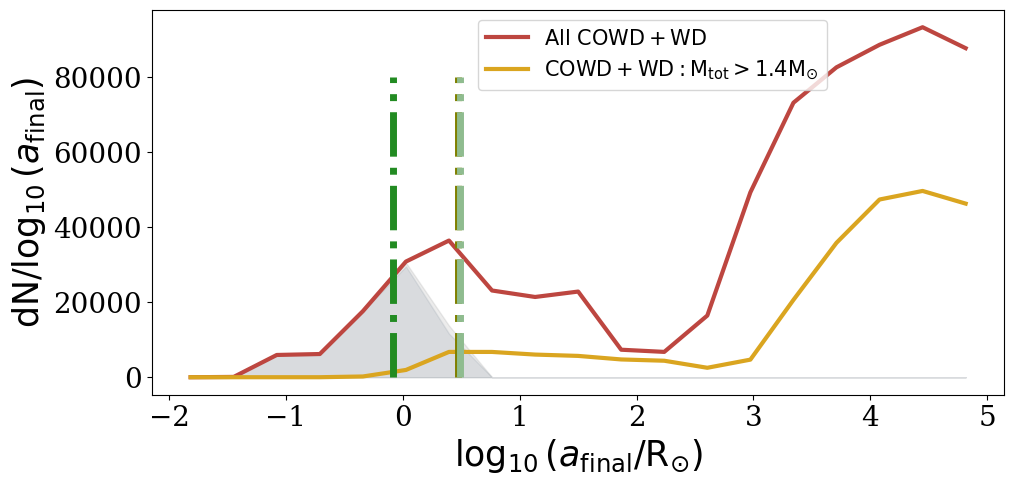

In [55]:

plt.figure(figsize=(11,5))
# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution

# in histograms usually want to take the log of the value rather than changing the y or xscale to log
# helps us keep track of what values we are actually plotting 
separations_log = np.log10(SP_COWD_data['SemiMajorAxis'])
hist, bin_edges = np.histogram(separations_log, weights=SP_COWD_data['mixture_weight'],bins=np.linspace(-2,5,20))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width, color='#BD4640',lw=3,label=r'$\mathrm{All}$ $\mathrm{COWD+WD}$')

# systems where M_tot > 1.4 solar masses
separations_log_chandra = np.log10(SP_COWD_data_chandra['SemiMajorAxis'])
hist_chandra, bin_edges_chandra = np.histogram(separations_log_chandra, weights=SP_COWD_data_chandra['mixture_weight'],bins=np.linspace(-2,5,20))
center_bins_chandra = (bin_edges_chandra[:-1] + bin_edges_chandra[1:])/2
bin_width_chandra = np.diff(bin_edges_chandra)

plt.plot(center_bins_chandra,hist_chandra/bin_width_chandra,lw=3,color='goldenrod', label=r'$\mathrm{COWD+WD: M_{tot} > 1.4 M_{\odot}}$')

# small coalescence times
separations_log_col = np.log10(SP_WDWD_col['SemiMajorAxis'])
hist_col, bin_edges_col = np.histogram(separations_log_col, weights=SP_WDWD_col['mixture_weight'],bins=np.linspace(-2,5,20))
center_bins_col = (bin_edges_col[:-1] + bin_edges_col[1:])/2
bin_width_col = np.diff(bin_edges_col)

# plt.plot(center_bins_col,hist_col/bin_width_col,color='black')
plt.fill_between(center_bins_col, hist_col/bin_width_col, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')

# small delay times
separations_log_delay = np.log10(SP_WDWD_delay['SemiMajorAxis'])
hist_delay, bin_edges_delay = np.histogram(separations_log_delay, weights=SP_WDWD_delay['mixture_weight'],bins=np.linspace(-2,5,20))
center_bins_delay = (bin_edges_delay[:-1] + bin_edges_delay[1:])/2
bin_width_delay = np.diff(bin_edges_delay)

# plt.plot(center_bins_delay,hist_delay/bin_width_delay,color='grey')
plt.fill_between(center_bins_delay, hist_delay/bin_width_delay, 
                alpha=0.15, 
                color="slategray")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


### adding the extra separation conditions

## max(m2), min(m1)
plt.vlines(np.log10(separation_tdel),color='olive',linestyle='-.',linewidth=5,ymin=0,ymax=80000)#, label=r'$t_{delay} < t_{hubble}$')
plt.vlines(np.log10(separation_tcol), color='darkseagreen',linestyle='-.',linewidth=5,ymin=0,ymax=80000)#, label=r'$t_{col} < t_{hubble}$')
plt.vlines(np.log10(separation_stellar_merger),color='forestgreen',linestyle='-.',linewidth=5,ymin=0,ymax=80000)#, label=r'$t_{delay}(r_{1} + r_{2} < a)$')



## labeling 
plt.xlabel(r"$\log_{10}(a_{\mathrm{final}}/\mathrm{R_{\odot}})$",fontsize=25)
plt.ylabel(r"$\mathrm{dN}$/$\log_{10}(a_{\mathrm{final}})$",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## plt.ticks


plt.legend(loc='upper left',bbox_to_anchor=(0.37,1),fontsize=15)

## save figure
# plt.savefig("separations_distribution_COWD.pdf",bbox_inches='tight',pad_inches=0.1)

Let's break down the plot for presenation purposes

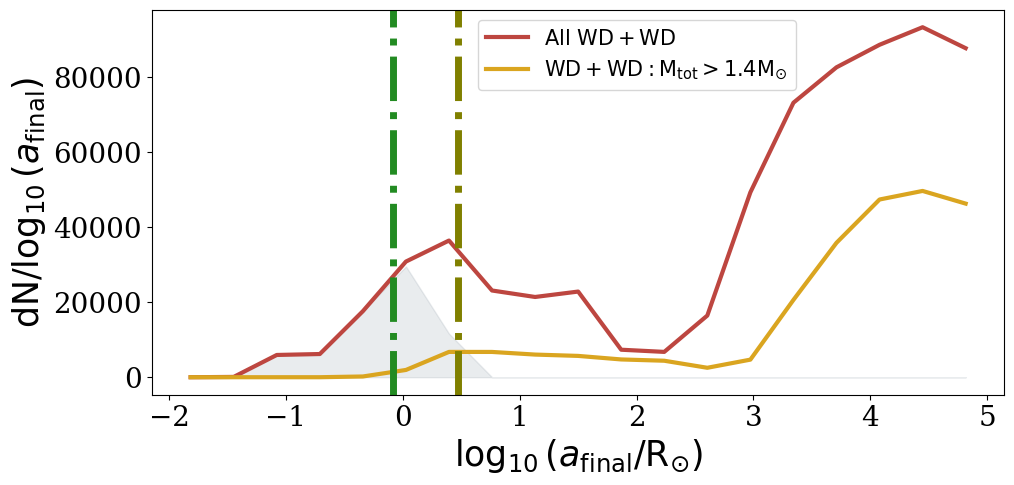

In [47]:

plt.figure(figsize=(11,5))
# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution

# in histograms usually want to take the log of the value rather than changing the y or xscale to log
# helps us keep track of what values we are actually plotting 
separations_log = np.log10(SP_COWD_data['SemiMajorAxis'])
hist, bin_edges = np.histogram(separations_log, weights=SP_COWD_data['mixture_weight'],bins=np.linspace(-2,5,20))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width, color='#BD4640',lw=3,label=r'$\mathrm{All}$ $\mathrm{WD+WD}$')

# systems where M_tot > 1.4 solar masses
separations_log_chandra = np.log10(SP_COWD_data_chandra['SemiMajorAxis'])
hist_chandra, bin_edges_chandra = np.histogram(separations_log_chandra, weights=SP_COWD_data_chandra['mixture_weight'],bins=np.linspace(-2,5,20))
center_bins_chandra = (bin_edges_chandra[:-1] + bin_edges_chandra[1:])/2
bin_width_chandra = np.diff(bin_edges_chandra)

plt.plot(center_bins_chandra,hist_chandra/bin_width_chandra,lw=3,color='goldenrod', label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')

# small coalescence times
# separations_log_col = np.log10(SP_WDWD_col['SemiMajorAxis'])
# hist_col, bin_edges_col = np.histogram(separations_log_col, weights=SP_WDWD_col['mixture_weight'],bins=np.linspace(-2,5,20))
# center_bins_col = (bin_edges_col[:-1] + bin_edges_col[1:])/2
# bin_width_col = np.diff(bin_edges_col)

# # plt.plot(center_bins_col,hist_col/bin_width_col,color='black')
# plt.fill_between(center_bins_col, hist_col/bin_width_col, 
#                 alpha=0.15, 
#                 color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')

# # small delay times
separations_log_delay = np.log10(SP_WDWD_delay['SemiMajorAxis'])
hist_delay, bin_edges_delay = np.histogram(separations_log_delay, weights=SP_WDWD_delay['mixture_weight'],bins=np.linspace(-2,5,20))
center_bins_delay = (bin_edges_delay[:-1] + bin_edges_delay[1:])/2
bin_width_delay = np.diff(bin_edges_delay)

# plt.plot(center_bins_delay,hist_delay/bin_width_delay,color='grey')
plt.fill_between(center_bins_delay, hist_delay/bin_width_delay, 
                alpha=0.15, 
                color="slategray")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


### adding the extra separation conditions

## max(m2), min(m1)
plt.axvline(np.log10(separation_tdel),color='olive',linestyle='-.',linewidth=5)#, label=r'$t_{delay} < t_{hubble}$')
#plt.axvline(np.log10(separation_tcol), color='darkseagreen',linestyle='-.',linewidth=5)#, label=r'$t_{col} < t_{hubble}$')
plt.axvline(np.log10(separation_stellar_merger),color='forestgreen',linestyle='-.',linewidth=5)#, label=r'$t_{delay}(r_{1} + r_{2} < a)$')



## labeling 
plt.xlabel(r"$\log_{10}(a_{\mathrm{final}}/\mathrm{R_{\odot}})$",fontsize=25)
plt.ylabel(r"$\mathrm{dN}$/$\log_{10}(a_{\mathrm{final}})$",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## plt.ticks


plt.legend(loc='upper left',bbox_to_anchor=(0.37,1),fontsize=15)

## save figure
# plt.savefig("separations_distribution.pdf",bbox_inches='tight',pad_inches=0.1)

In [56]:
# mtot>1.4
tot_mass_chandra_bool = SP_COWD_data['Mass(1)'] + SP_COWD_data['Mass(2)'] > 1.4 # making the bool
SP_COWD_data_chandra_better = SP_COWD_data[tot_mass_chandra_bool] # using the bool to slice the data

Another lifetime dist. with the sub Chandrasekhar systems

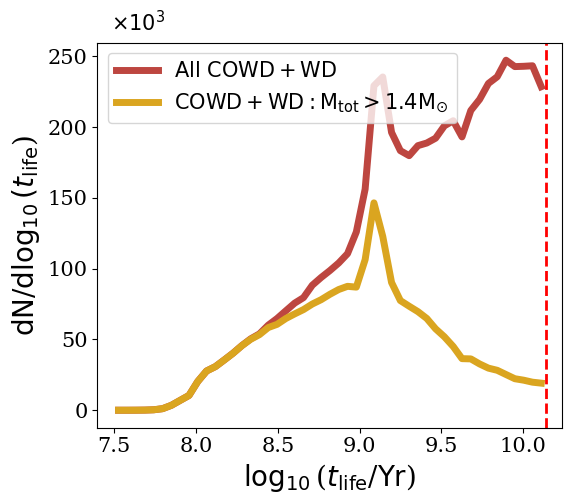

In [58]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution

## hubble time
age_universe = 13.7e9

fig, ax = plt.subplots(figsize=(6,5))

## all systems
time_life_log_all = np.log10(SP_COWD_data['Time']*(1e6))
hist_all, bin_edges_all = np.histogram(time_life_log_all, weights=SP_COWD_data['mixture_weight'],bins=np.linspace(7.5,np.log10(age_universe),50))
center_bins_all = (bin_edges_all[:-1] + bin_edges_all[1:])/2
bin_width_all = np.diff(bin_edges_all)

plt.plot(center_bins_all,(hist_all/bin_width_all)*1e-3,color='#BD4640',lw=5, label=r'$\mathrm{All}$ $\mathrm{COWD+WD}$')


## sub-chandrasekhar systems
time_life_log = np.log10(SP_COWD_data_chandra_better['Time']*(1e6))
hist, bin_edges = np.histogram(time_life_log, weights=SP_COWD_data_chandra_better['mixture_weight'],bins=np.linspace(7.5,np.log10(age_universe),50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,(hist/bin_width)*1e-3,color='goldenrod',lw=5, label=r'$\mathrm{COWD+WD: M_{tot} > 1.4 M_{\odot}}$')
# plt.step(center_bins,hist/bin_width,where='mid')

plt.text(0.03, 1.03, r'$\times 10^3$', fontsize = 15,  transform = ax.transAxes)

plt.xlabel(r"$\log_{10}$($t_{\mathrm{life}}$/$\mathrm{Yr}$)",fontsize=20)
# plt.yscale('log')
# plt.xlim(0,15e9)
# plt.ylim(1e-1,1e3)
plt.ylabel(r"$\mathrm{dN}$/$\mathrm{d}\log_{10}(t_{\mathrm{life}}$)",fontsize=20) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.axvline(np.log10(age_universe), color='r', linestyle='--', linewidth=2)#,label='Hubble Time')
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)
plt.legend(fontsize=15)

## save figure:
# plt.savefig("lifetime_distributions_COWD.pdf",bbox_inches='tight',pad_inches=0.1)

In [52]:
## seeing which systems have lifetimes larger than the age of the universe
small_life_bool = SP_WDWD_data_sb_chandra['Time']*(1e6) > 13.7e9
sum(small_life_bool)

0

In [148]:

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution

# # in histograms usually want to take the log of the value rather than changing the y or xscale to log
# # helps us keep track of what values we are actually plotting 
# separations_log = np.log10(SP_WDWD_data['SemiMajorAxis'])
# hist, bin_edges = np.histogram(separations_log, weights=SP_WDWD_data['mixture_weight'],bins=np.linspace(-2,5,20))
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width, label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')



# ### adding the extra separation conditions

# ## case 1 - minminal masses
# plt.axvline(np.log10(separation_case1_tcol), color='purple',linestyle=':',linewidth=1)#, label=r'$t_{col} < t_{hubble}$')
# plt.axvline(np.log10(separation_case1_tdel),color='purple',linestyle='-',linewidth=1)#, label=r'$t_{delay} < t_{hubble}$')
# plt.axvline(np.log10(separation_case1_sm),color='purple',linestyle='-.',linewidth=1)#, label=r'$t_{delay}(r_{1} + r_{2} < a)$')

# # first_legend = plt.legend(handles)
# ## case 2 - maximal masses
# plt.axvline(np.log10(separation_case2_tcol), color='#4B4E6D',linestyle=':',linewidth=1)#, label=r'$t_{col} < t_{hubble}$')
# plt.axvline(np.log10(separation_case2_tdel),color='#4B4E6D',linestyle='-',linewidth=1)#, label=r'$t_{delay} < t_{hubble}$')
# plt.axvline(np.log10(separation_case2_sm),color='#4B4E6D',linestyle='-.',linewidth=1)#, label=r'$t_{delay}(r_{1} + r_{2} < a)$')

# ## case 3 - max(m1), min(m2)
# plt.axvline(np.log10(separation_case3_tcol), color='#80B192',linestyle=':',linewidth=1)#, label=r'$t_{col} < t_{hubble}$')
# plt.axvline(np.log10(separation_case3_tdel),color='#80B192',linestyle='-',linewidth=1)#, label=r'$t_{delay} < t_{hubble}$')
# plt.axvline(np.log10(separation_case3_sm),color='#80B192',linestyle='-.',linewidth=1)#, label=r'$t_{delay}(r_{1} + r_{2} < a)$')



# ## labeling 
# plt.xlabel(r"$\log_{10}(a/\mathrm{R_{\odot}})$",fontsize=30)
# plt.ylabel(r"dR/$\log_{a}$")

# ## plt.ticks

# # Create the legend with custom handles and multi-column
# # Create custom legend handles for row labels
# row_label1 = Line2D([0], [0], color='w', lw=0, label=r"$M_{1}=min ,M_{2}=min$")
# row_label2 = Line2D([0], [0], color='w', lw=0, label=r"$M_{1}=max ,M_{2}=max$")
# row_label3 = Line2D([0], [0], color='w', lw=0, label=r"$M_{1}=max ,M_{2}=min$")



# # Create custom legend handles for the functions
# # custom_lines = [
# #     row_label1, 
# #     Line2D([0], [0], color='purple', lw=2, linestyle=':', label=r'$t_{col} < t_{hubble}$'),
# #     Line2D([0], [0], color='purple', lw=2, linestyle='-', label=r'$t_{delay} < t_{hubble}$'),
# #     Line2D([0], [0], color='purple', lw=2, linestyle='-.', label=r'$t_{delay}(r_{1} + r_{2} < a)$'),
# #     row_label2, 
# #     Line2D([0], [0], color='#4B4E6D', lw=2, linestyle=':', label=r'$t_{col} < t_{hubble}$'),
# #     Line2D([0], [0], color='#4B4E6D', lw=2, linestyle='-', label=r'$t_{delay} < t_{hubble}$'),
# #     Line2D([0], [0], color='#4B4E6D', lw=2, linestyle='-.', label=r'$t_{delay}(r_{1} + r_{2} < a)$'),
# #     row_label3, 
# #     Line2D([0], [0], color='#80B192', lw=2, linestyle=':', label=r'$t_{col} < t_{hubble}$'),
# #     Line2D([0], [0], color='#80B192', lw=2, linestyle='-', label=r'$t_{delay} < t_{hubble}$'),
# #     Line2D([0], [0], color='#80B192', lw=2, linestyle='-.', label=r'$t_{delay}(r_{1} + r_{2} < a)$')
# # ]


# # plt.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5,-0.15), ncol=3, frameon=True, handletextpad=1.5, columnspacing=2)

# # making room in the plot for the legend
# # plt.subplots_adjust(bottom=0.1)

# #plt.legend()#(labels=[r"$M_{1}= M_{2}=$",r"$M_{1}= M_{2}=$",r"$M_{1}= M_{2}=$"], ncol = 1)
# # ':','-','-.' linetypes

# plt.legend()

# ## save figure
# # plt.savefig("separations_all.png")

In [48]:
# check in mass transfer history tracker 1 is NA for these systems that and after plotting they should have similar separations as the ones in the plot about that have very larger separations (look at how to deal with byte strings)
# these systems above never interacted


# Convert byte string to string
SP_WDWD_data['MT_Donor_Hist(1)_Decoded'] = SP_WDWD_data['MT_Donor_Hist(1)'].apply(lambda x: x.decode('utf-8'))
SP_WDWD_data['MT_Donor_Hist(2)_Decoded'] = SP_WDWD_data['MT_Donor_Hist(2)'].apply(lambda x: x.decode('utf-8'))

# Define the criterion byte string
criterion = b'NA '

# Convert the criterion to string
criterion_str = criterion.decode('utf-8')

# Filter the DataFrame based on the criterion
filtered_df_1 = SP_WDWD_data[SP_WDWD_data['MT_Donor_Hist(1)_Decoded'].str.contains(criterion_str)]
filtered_df_2 = SP_WDWD_data[SP_WDWD_data['MT_Donor_Hist(2)_Decoded'].str.contains(criterion_str)]

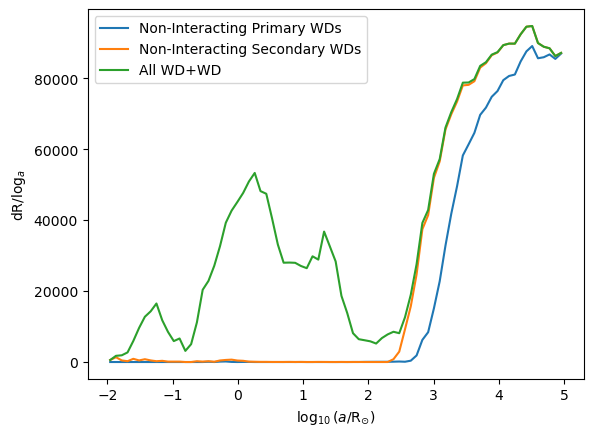

In [49]:
# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution

# in histograms usually want to take the log of the value rather than changing the y or xscale to log
# helps us keep track of what values we are actually plotting 

# non interacting data - primary mass
separations_non_interacting_log = np.log10(filtered_df_1['SemiMajorAxis'])
hist_non, bin_edges_non = np.histogram(separations_non_interacting_log, weights=filtered_df_1['mixture_weight'],bins=np.linspace(-2,5,80))
center_bins_non = (bin_edges_non[:-1] + bin_edges_non[1:])/2
bin_width_non = np.diff(bin_edges_non)

plt.plot(center_bins_non,hist_non/bin_width_non, label='Non-Interacting Primary WDs')

# non interactind datat - secondary mass
separations_non_interacting_log_2 = np.log10(filtered_df_2['SemiMajorAxis'])
hist_non_2, bin_edges_non_2 = np.histogram(separations_non_interacting_log_2, weights=filtered_df_2['mixture_weight'],bins=np.linspace(-2,5,80))
center_bins_non_2 = (bin_edges_non_2[:-1] + bin_edges_non_2[1:])/2
bin_width_non_2 = np.diff(bin_edges_non_2)

plt.plot(center_bins_non_2,hist_non_2/bin_width_non_2, label='Non-Interacting Secondary WDs')

# all data
separations_log = np.log10(SP_WDWD_data['SemiMajorAxis'])
hist, bin_edges = np.histogram(separations_log, weights=SP_WDWD_data['mixture_weight'],bins=np.linspace(-2,5,80))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='All WD+WD')



## labeling 
plt.xlabel(r"$\log_{10}(a/\mathrm{R_{\odot}})$")
plt.ylabel(r"dR/$\log_{a}$")
plt.legend()

## save plot
# plt.savefig("separations_non_interacting.png")

Let's find where the separation is around the sum of the radii (stellar mergers)

In [212]:
## let's see if these systems have nonzero masses in other groups

# let's gather the rlof group 

RLOF_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_RLOF"].keys(): #looping through the "keys" or paramters in BSE_RLOF

    RLOF_WD_data[key] = Data_weights["BSE_RLOF"][key][()] # adding these columns to the dataframe

In [213]:
# let's get the overlapping seed data
overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],SP_WDWD_data['SEED'])
# reading in the sliced table
RLOF_WD_data_overlap = RLOF_WD_data[overlap_seeds_bool]
RLOF_WD_data_overlap.sort_values(by="SEED")

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
7,9.576206e-02,0,0.0,0.0,31.122640,65.036593,1,3.683827,0.571474,2.204171,2.502217,8.678800e+01,0,0.001030,0,1,0,0,15.769045,0.127128,1.056006,0.002482,1.320597,1.368952,0.111795,0.013704,1,12,35.215570,196.155880,2,7,1,1,38275.914919,14024.030092,177.706321,177.764377,-0.222642,-0.222642,0.00000,-0.222642,-0.333333,-0.333333,0.000000,-0.333333
6,4.741412e-21,1,0.0,0.0,0.000112,4903.653114,2,0.571069,0.571069,2.451374,0.746976,4.220406e+03,0,0.001030,0,0,0,1,0.013177,0.013177,0.000252,0.006233,101.552442,0.442456,1.003007,0.185133,1,12,199.481974,5.939665,11,11,5,8,5183.226756,72689.629540,593.868532,593.881015,0.000000,0.639597,0.00000,0.000000,0.000000,3.593265,0.000000,0.000000
8,8.858895e-07,0,0.0,0.0,75.517361,9.682190,1,1.159063,0.887465,1.781343,1.781343,3.264432e+06,0,0.027172,0,1,0,0,1789.739129,0.009319,1.000955,0.000004,1.670672,1.670672,0.000768,0.000525,1,13,5222.265648,7230.805809,6,11,1,1,176445.245935,7885.430252,209.700811,209.705811,0.000000,-0.316577,0.00000,-0.316577,0.000000,-0.333333,0.000000,-0.333333
9,8.928002e-04,1,0.0,0.0,49.251325,1.082991,1,1.228280,0.376148,0.881892,0.881892,3.761785e+02,0,0.000781,0,1,0,0,33.850410,0.016420,1.005048,0.010534,0.858753,0.858753,0.029662,0.373762,1,16,82.570395,5.059013,3,10,1,1,119454.292134,6360.620572,3125.067570,3125.247279,0.000000,-0.210705,0.00000,-0.210705,0.000000,-0.333333,0.000000,-0.333333
10,1.000000e+00,0,0.0,0.0,0.000027,19.067777,2,0.376148,1.112307,0.881786,0.145627,4.331267e-01,0,0.000781,0,0,0,1,0.016420,0.006764,0.010533,0.000580,2.320281,0.024095,1.009812,0.005142,1,16,5.059440,20.967088,10,10,2,10,5052.837882,77783.954597,9592.758711,9600.920352,0.000000,0.000000,-0.20186,0.000000,0.000000,0.000000,0.204135,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494345,2.648748e-04,1,0.0,0.0,18928.153573,30.175770,1,2.531057,0.746323,1.927200,1.927200,2.790191e+04,0,0.001812,0,1,0,0,292.773092,0.010938,1.016660,0.000272,1.482083,1.482083,0.005829,0.023946,1,999974,715.069175,133.748522,5,11,1,1,3150.253774,11123.867424,496.802247,496.808479,0.000000,-0.244339,0.00000,-0.244339,0.000000,-0.333333,0.000000,-0.333333
494346,2.643454e-02,0,0.0,0.0,341.498943,116.432737,1,1.980523,0.539050,1.995975,2.034079,1.247677e+04,0,0.022641,0,1,0,0,193.292724,0.173572,1.009598,0.000254,17.753475,17.621477,0.092400,0.014138,1,999975,506.163036,2511.459752,5,8,4,4,59619.033315,4521.423232,1459.512506,1459.519309,-0.026612,-0.306511,0.00000,-0.306511,1.324044,0.063615,0.000000,0.063615
494350,5.495433e-15,0,0.0,0.0,0.000027,17.120385,2,0.664560,0.664560,1.537462,0.257299,5.426133e+00,0,0.000144,0,0,0,1,0.011936,0.011936,0.002527,0.000941,6.924883,0.019363,1.000579,0.002350,1,999981,15.278810,27.423122,11,11,2,10,3827.881314,84463.587963,1530.852003,1531.618963,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
494351,9.557627e-04,1,0.0,0.0,1036.304392,14.737375,1,1.973787,0.664667,1.537839,1.537839,3.600607e+03,0,0.000144,0,1,0,0,87.154826,0.230925,1.005199,0.048900,1.127577,1.127577,0.014575,0.162957,1,999981,216.380585,15.275450,5,8,1,1,68220.371865,10661.282973,874.591896,874.603628,0.165564,-0.147606,0.00000,-0.147606,1.421011,-0.333333,0.000000,-0.333333


In [214]:
# let's select for only binary WD to make sure we are dealing with the same systems
wd_bool = useful_fncs.WDWD_bools(RLOF_WD_data_overlap,'Stellar_Type(1)>MT','Stellar_Type(2)>MT')
RLOF_WDWD = RLOF_WD_data_overlap[wd_bool]
RLOF_WDWD

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
10,1.000000e+00,0,0.0,0.0,0.000027,19.067777,2,0.376148,1.112307,0.881786,0.145627,0.433127,0,0.000781,0,0,0,1,0.016420,0.006764,0.010533,0.000580,2.320281,0.024095,1.009812,0.005142,1,16,5.059440,20.967088,10,10,2,10,5052.837882,77783.954597,9592.758711,9600.920352,0.0,0.0,-0.20186,0.0,0.0,0.0,0.204135,0.0
14,1.711519e-09,0,0.0,0.0,0.018111,52.637859,3,0.775421,0.775421,1.339160,0.806915,938.990478,0,0.013982,0,0,0,1,0.010596,0.010596,0.003161,0.003006,4.799121,0.010232,1.115925,0.002850,1,20,10.072797,9.387247,11,11,8,11,20591.870970,153861.663124,192.363048,192.369580,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
29,8.583619e-20,0,0.0,0.0,0.000006,49.253935,2,0.982019,0.982019,1.033987,0.469994,3573.728166,0,0.000448,0,0,0,1,0.008260,0.008260,0.000110,0.000044,76.691005,0.014707,1.000559,0.000109,1,41,199.920697,425.131543,11,11,3,10,3088.562225,126220.279550,4315.782119,4315.862122,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
34,1.000000e+00,1,0.0,0.0,0.000153,76.737880,2,0.408430,0.408430,1.322994,0.179267,0.630898,0,0.015102,0,0,0,1,0.015788,0.015788,0.007780,0.215733,3.498707,0.022304,1.011077,0.443462,1,49,7.166521,0.162051,10,10,3,10,5117.062200,114508.777970,4015.089632,4019.363959,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
37,1.000000e+00,1,0.0,0.0,0.000118,93.494725,2,0.337740,0.337740,0.693103,0.463446,11811.841173,0,0.002303,0,0,0,1,0.017246,0.017246,0.000163,0.002603,148.178324,0.014815,1.010424,0.001935,1,54,331.563229,18.826860,10,10,3,10,4585.121663,147610.905673,10998.582121,10998.650919,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494314,1.047143e-08,0,0.0,0.0,0.000468,26.476747,4,0.773363,0.773363,0.809905,0.658614,152.497069,0,0.004168,0,0,0,1,0.010620,0.010620,0.016377,0.013827,0.667068,0.012012,1.007212,0.016830,1,999912,1.729564,1.954841,11,11,8,11,8245.198251,119589.931981,382.464907,382.472452,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
494317,1.051417e-20,1,0.0,0.0,0.000020,85.878242,2,0.741010,0.741010,1.301438,0.462921,5042.974418,0,0.001867,0,0,0,1,0.011001,0.011001,0.000117,0.003761,123.032836,0.014824,1.014294,0.006282,1,999916,283.115026,6.960621,11,11,3,10,3682.175531,144465.470695,2587.478843,2587.524497,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
494323,1.962921e-22,1,0.0,0.0,0.002778,38.932489,2,0.939131,0.939131,3.117657,0.899635,66550.120401,0,0.002314,0,0,0,1,0.008741,0.008741,0.000033,0.000085,463.742455,0.009182,1.004717,0.000091,1,999931,951.640439,268.079678,11,11,5,11,14188.613077,197553.163750,341.271764,341.275741,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0
494331,6.669572e-23,1,0.0,0.0,0.000642,17.616969,3,1.050739,1.050739,3.153164,0.943230,153050.767567,0,0.000613,0,0,0,1,0.007482,0.007482,0.000027,0.000070,450.736307,0.008695,1.001447,0.000085,1,999947,945.374507,276.666132,11,11,6,11,10632.803684,126950.150079,230.371185,230.376185,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0


In [215]:
stellar_merger_bool = RLOF_WDWD['RLOF(1)>MT'] + RLOF_WDWD['RLOF(2)>MT'] > RLOF_WDWD['SemiMajorAxis>MT']

In [216]:
RLOF_WDWD_SM = RLOF_WDWD[stellar_merger_bool]

Let's take some properties from this system to get separations of the stellar mergers (lower limits)

In [91]:
## case 1 min(m1), min(m2)
time_min_m2_sm = float(RLOF_WDWD_SM['Time>MT'].loc[RLOF_WDWD_SM['Mass(2)>MT']==min(RLOF_WDWD_SM['Mass(2)>MT'])])
time_max_m2_sm = float(RLOF_WDWD_SM['Time>MT'].loc[RLOF_WDWD_SM['Mass(2)>MT']==max(RLOF_WDWD_SM['Mass(2)>MT'])])

separation_case1_sm = useful_fncs.separations(0,min(RLOF_WDWD_SM['Mass(1)>MT']),min(RLOF_WDWD_SM['Mass(2)>MT']),(time_min_m2_sm))
print("stellar merger separation case 1:",separation_case1_sm) 

### let's first do a case coresponding to 2 1 M_sun WDs - since this is a more massive system they have smaller delay times
separation_case2_sm = useful_fncs.separations(0,max(RLOF_WDWD_SM['Mass(1)>MT']),max(RLOF_WDWD_SM['Mass(2)>MT']),time_max_m2_sm)
print("stellar merger separation case 2:", separation_case2_sm)

separation_case3_sm = useful_fncs.separations(0,max(RLOF_WDWD_SM['Mass(1)>MT']),min(RLOF_WDWD_SM['Mass(2)>MT']),(time_min_m2_sm))
print("stellar merger separation case 3:",separation_case3_sm) 

stellar merger separation case 1: 0.20679933299320052
stellar merger separation case 2: 4.663183758006872
stellar merger separation case 3: 0.6518975576326376


/tmp/ipykernel_2453541/1704175702.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_min_m2_sm = float(RLOF_WDWD_SM['Time>MT'].loc[RLOF_WDWD_SM['Mass(2)>MT']==min(RLOF_WDWD_SM['Mass(2)>MT'])])
/tmp/ipykernel_2453541/1704175702.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  time_max_m2_sm = float(RLOF_WDWD_SM['Time>MT'].loc[RLOF_WDWD_SM['Mass(2)>MT']==max(RLOF_WDWD_SM['Mass(2)>MT'])])


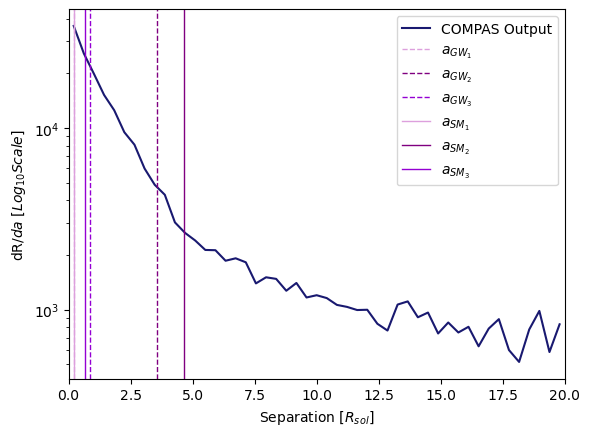

In [92]:

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(SP_WDWD_data['SemiMajorAxis'], weights=SP_WDWD_data['mixture_weight'],bins=np.linspace(0,20,50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,color='midnightblue',label='COMPAS Output')
# plt.step(center_bins,hist/bin_width,where='mid')

### adding the extra separation conditions

## a_gw
## case 1 - minminal masses
plt.axvline(separation_case1,color='plum',linestyle='--',linewidth=1, label=r'$a_{GW_{1}}$')

## example case/ case 2 
plt.axvline(example_separation,color='purple',linestyle='--',linewidth=1, label=r'$a_{GW_{2}}$')

## case 3 - max(m1), min(m2)
plt.axvline(separation_case3,color='darkviolet',linestyle='--',linewidth=1, label=r'$a_{GW_{3}}$')

## a_stellar_merger
## case 1 - minminal masses
plt.axvline(separation_case1_sm,color='plum',linestyle='-',linewidth=1, label=r'$a_{SM_{1}}$')

## example case/ case 2 
plt.axvline(separation_case2_sm,color='purple',linestyle='-',linewidth=1, label=r'$a_{SM_{2}}$')

## case 3 - max(m1), min(m2)
plt.axvline(separation_case3_sm,color='darkviolet',linestyle='-',linewidth=1, label=r'$a_{SM_{3}}$')



plt.xlabel(r"Separation [$R_{sol}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.xlim(0,20)
plt.ylabel(r"dR/$da$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\
plt.legend()

# chandrasekhar limit
# chandra_limit = 1.4 

# plt.axvline(chandra_limit, color='r', linestyle='--', linewidth=2)
# plt.text(1.15, 10**4.5, "Chandrasekhar Limit", fontsize=10)